In [1]:
#standard library imports

#Third party imports
import warnings  # for warning handlings
import pandas as pd # for numerical operations and mathematical functions
import numpy as np # 
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # for statistical graphics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report


warnings.filterwarnings("ignore")  


In [2]:
file_path = ("C:\\Users\\Meriya Ninan\\Desktop\\immunization_data.csv")
df = pd.read_csv(file_path) #immunization = df

In [3]:
df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Africa Eastern and Southern,AFE,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,140.180526,140.810248,141.664168,142.324951,143.456933,144.33115,...,107.697715,105.501833,103.222825,100.963526,99.491703,99.085572,97.413585,96.181442,94.688181,NaN
1,Africa Eastern and Southern,AFE,Adults (ages 15+) and children (0-14 years) li...,SH.HIV.TOTL,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Africa Eastern and Southern,AFE,Adults (ages 15+) and children (ages 0-14) new...,SH.HIV.INCD.TL,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Africa Eastern and Southern,AFE,Adults (ages 15+) living with HIV,SH.DYN.AIDS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Africa Eastern and Southern,AFE,Adults (ages 15-49) newly infected with HIV,SH.HIV.INCD,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125020 entries, 0 to 125019
Data columns (total 68 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Country Name    125020 non-null  object 
 1   Country Code    125020 non-null  object 
 2   Indicator Name  125020 non-null  object 
 3   Indicator Code  125020 non-null  object 
 4   1960            41829 non-null   float64
 5   1961            42383 non-null   float64
 6   1962            42497 non-null   float64
 7   1963            42546 non-null   float64
 8   1964            42602 non-null   float64
 9   1965            42762 non-null   float64
 10  1966            42703 non-null   float64
 11  1967            42761 non-null   float64
 12  1968            42831 non-null   float64
 13  1969            42928 non-null   float64
 14  1970            44334 non-null   float64
 15  1971            45054 non-null   float64
 16  1972            45123 non-null   float64
 17  1973      

In [5]:
# descriptive statistics of numeric variables only
df.describe().T.round(2) #matrix transporse (round to)

,count,mean,std,min,25%,50%,75%,max
1960,41829.0,4038962.38,4.856276e+07,-597338.0,13.83,1257.50,69759.00,3.031517e+09
1961,42383.0,4040506.10,4.880721e+07,-674432.0,12.12,1138.00,68898.00,3.072470e+09
1962,42497.0,4102963.16,4.958174e+07,-766263.0,12.23,1151.00,69695.00,3.126894e+09
1963,42546.0,4188941.44,5.064490e+07,-869246.0,12.35,1181.25,70977.12,3.193470e+09
1964,42602.0,4274776.47,5.170897e+07,-779706.0,12.50,1204.00,72078.88,3.260480e+09
...,...,...,...,...,...,...,...,...
2019,82358.0,6238933.58,9.625278e+07,-3891454.0,7.60,67.00,13000.00,7.742725e+09
2020,74328.0,6701981.78,1.014575e+08,-2212227.0,7.22,82.28,25485.00,7.821272e+09
2021,71103.0,7086576.33,1.048022e+08,-2014843.0,7.95,87.83,32169.75,7.888964e+09
2022,64614.0,7753723.88,1.106674e+08,-9195009.0,7.85,94.00,49391.00,7.951595e+09


In [6]:
df.describe(include=object)

,Country Name,Country Code,Indicator Name,Indicator Code
count,125020,125020,125020,125020
unique,266,266,470,470
top,Africa Eastern and Southern,AFE,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT
freq,470,470,266,266


In [7]:
# Handling missing data
df.isnull().sum()

Country Name          0
Country Code          0
Indicator Name        0
Indicator Code        0
1960              83191
                  ...  
2019              42662
2020              50692
2021              53917
2022              60406
2023              85835
Length: 68, dtype: int64

In [8]:
df.fillna("unknown", inplace=True)

print(df)
         
# imputing missing values

                       Country Name Country Code  \
0       Africa Eastern and Southern          AFE   
1       Africa Eastern and Southern          AFE   
2       Africa Eastern and Southern          AFE   
3       Africa Eastern and Southern          AFE   
4       Africa Eastern and Southern          AFE   
...                             ...          ...   
125015                     Zimbabwe          ZWE   
125016                     Zimbabwe          ZWE   
125017                     Zimbabwe          ZWE   
125018                     Zimbabwe          ZWE   
125019                     Zimbabwe          ZWE   

                                           Indicator Name     Indicator Code  \
0       Adolescent fertility rate (births per 1,000 wo...        SP.ADO.TFRT   
1       Adults (ages 15+) and children (0-14 years) li...        SH.HIV.TOTL   
2       Adults (ages 15+) and children (ages 0-14) new...     SH.HIV.INCD.TL   
3                       Adults (ages 15+) living with H

In [9]:
 df.duplicated() #identifying duplicate rows

0         False
1         False
2         False
3         False
4         False
          ...  
125015    False
125016    False
125017    False
125018    False
125019    False
Length: 125020, dtype: bool

In [10]:
df.drop_duplicates() #removing duplicates

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Africa Eastern and Southern,AFE,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,140.180526,140.810248,141.664168,142.324951,143.456933,144.33115,...,107.697715,105.501833,103.222825,100.963526,99.491703,99.085572,97.413585,96.181442,94.688181,unknown
1,Africa Eastern and Southern,AFE,Adults (ages 15+) and children (0-14 years) li...,SH.HIV.TOTL,unknown,unknown,unknown,unknown,unknown,unknown,...,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown
2,Africa Eastern and Southern,AFE,Adults (ages 15+) and children (ages 0-14) new...,SH.HIV.INCD.TL,unknown,unknown,unknown,unknown,unknown,unknown,...,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown
3,Africa Eastern and Southern,AFE,Adults (ages 15+) living with HIV,SH.DYN.AIDS,unknown,unknown,unknown,unknown,unknown,unknown,...,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown
4,Africa Eastern and Southern,AFE,Adults (ages 15-49) newly infected with HIV,SH.HIV.INCD,unknown,unknown,unknown,unknown,unknown,unknown,...,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125015,Zimbabwe,ZWE,Wanted fertility rate (births per woman),SP.DYN.WFRT,unknown,unknown,unknown,unknown,unknown,unknown,...,unknown,3.6,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown
125016,Zimbabwe,ZWE,Women who were first married by age 15 (% of w...,SP.M15.2024.FE.ZS,unknown,unknown,unknown,unknown,unknown,unknown,...,unknown,3.7,unknown,unknown,unknown,5.4,unknown,unknown,unknown,unknown
125017,Zimbabwe,ZWE,Women who were first married by age 18 (% of w...,SP.M18.2024.FE.ZS,unknown,unknown,unknown,unknown,unknown,unknown,...,unknown,32.4,unknown,unknown,unknown,33.7,unknown,unknown,unknown,unknown
125018,Zimbabwe,ZWE,Women's share of population ages 15+ living wi...,SH.DYN.AIDS.FE.ZS,unknown,unknown,unknown,unknown,unknown,unknown,...,59.606951,59.740456,59.888983,60.053623,60.216147,60.37761,60.551609,60.69318,60.825294,unknown


In [15]:
df= pd.DataFrame({
    'Color': ['Red', 'Blue', 'Green', 'Blue', 'Red'],
    'Shape': ['Circle', 'Square', 'Triangle', 'Circle', 'Square']})
dummies = pd.get_dummies(df)
print(dummies)

   Color_Blue  Color_Green  Color_Red  Shape_Circle  Shape_Square  \
0       False        False       True          True         False   
1        True        False      False         False          True   
2       False         True      False         False         False   
3        True        False      False          True         False   
4       False        False       True         False          True   

   Shape_Triangle  
0           False  
1           False  
2            True  
3           False  
4           False  


In [16]:

data = {'Feature1': [1, 2, 3, 4, 5],
        'Feature2': [100, 200, 300, 400, 500]}

df = pd.DataFrame(data)

scaler = MinMaxScaler () # Initialize the MinMaxScaler

scaled_data = scaler.fit_transform(df) # Fit and transform the data

# Convert the result back to a DataFrame (optional, for easier viewing)
scaled_df = pd.DataFrame(scaled_data, columns=df.columns)

# Show the scaled DataFrame
print(scaled_df)


   Feature1  Feature2
0      0.00      0.00
1      0.25      0.25
2      0.50      0.50
3      0.75      0.75
4      1.00      1.00


In [36]:
data = {'Feature1': [0.00, 0.25, 0.50, 0.75, 1.00]}
print(data)

{'Feature1': [0.0, 0.25, 0.5, 0.75, 1.0]}


In [37]:
data = {'Feature2':[0.00,0.25,0.50,0.75,1.00]}
print (data)

{'Feature2': [0.0, 0.25, 0.5, 0.75, 1.0]}


In [34]:
#IQR

data = {'value':[10, 12, 12, 15, 20, 22, 25, 28, 32, 1000]}
df = pd.DataFrame(data)

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['value'].quantile(0.25)
Q3 = df['value'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers_iqr = df[(df['value'] < lower_bound) | (df['value'] > upper_bound)]

# Output the outliers
print("Outliers based on IQR method:")
print(outliers_iqr)

# Optionally, remove outliers (i.e., filter out values outside the bounds)
df_no_outliers = df[(df['value'] >= lower_bound) & (df['value'] <= upper_bound)]
print("\nData after removing outliers:")
print(df_no_outliers)


Outliers based on IQR method:
   value
9   1000

Data after removing outliers:
   value
0     10
1     12
2     12
3     15
4     20
5     22
6     25
7     28
8     32


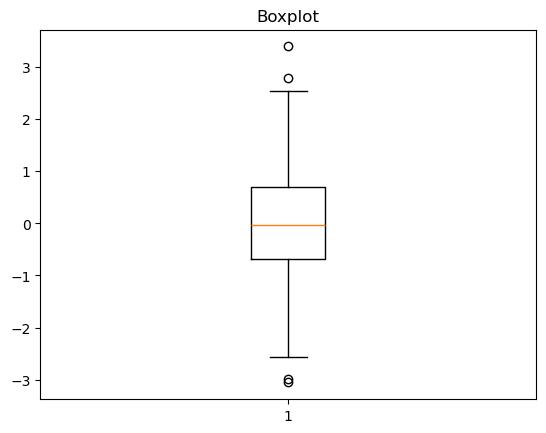

In [2]:

# Plotting boxplot
plt.boxplot(df['Value'])
plt.title("Boxplot")
plt.show()


In [13]:
import pandas as pd

# Input data
data = {'value': [10, 12, 12, 15, 20, 22, 25, 28, 32]}
df = pd.DataFrame(data)

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['value'].quantile(0.25)
Q3 = df['value'].quantile(0.75)
IQR = Q3 - Q1

# Define the outlier thresholds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find the outliers
outliers = df[(df['value'] < lower_bound) | (df['value'] > upper_bound)]

# Display outliers
print("Outliers:")
print(outliers)

# Display the calculated IQR, lower, and upper bounds
print("\nIQR Method: ")
print(f"Q1: {Q1}")
print(f"Q3: {Q3}")
print(f"IQR: {IQR}")
print(f"Lower Bound: {lower_bound}")
print(f"Upper Bound: {upper_bound}")


Outliers:
Empty DataFrame
Columns: [value]
Index: []

IQR Method: 
Q1: 12.0
Q3: 25.0
IQR: 13.0
Lower Bound: -7.5
Upper Bound: 44.5


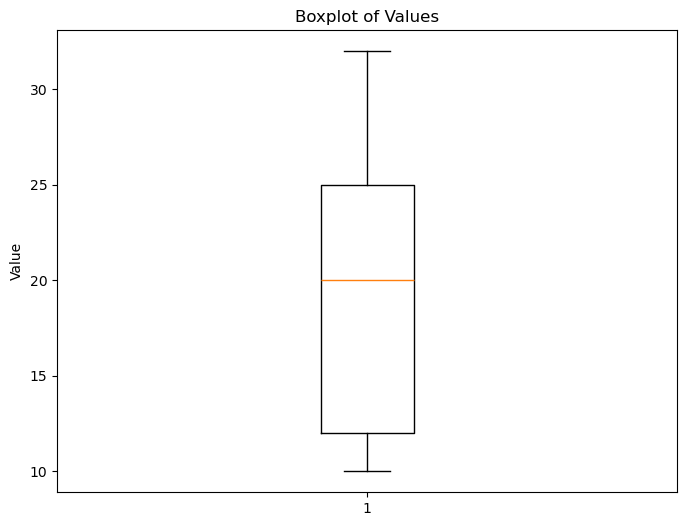

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.boxplot(df['value'])
plt.title("Boxplot of Values")
plt.ylabel("Value")
plt.show()


In [15]:
import pandas as pd

# Input data
data = {'value': [10, 12, 12, 15, 20, 22, 25, 28, 32]}
df = pd.DataFrame(data)

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['value'].quantile(0.25)
Q3 = df['value'].quantile(0.75)
IQR = Q3 - Q1

# Define the outlier thresholds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df_no_outliers = df[(df['value'] >= lower_bound) & (df['value'] <= upper_bound)]

# Display the cleaned data (no outliers)
print("Cleaned data without outliers:")
print(df_no_outliers)


Cleaned data without outliers:
   value
0     10
1     12
2     12
3     15
4     20
5     22
6     25
7     28
8     32


In [9]:
# Display the cleaned data
print("df without outliers:")
print('df_no_outliers')

df without outliers:
df_no_outliers
display the cleaned data


Cleaned data without outliers:
   value
0     10
1     12
2     12
3     15
4     20
5     22
6     25
7     28
8     32


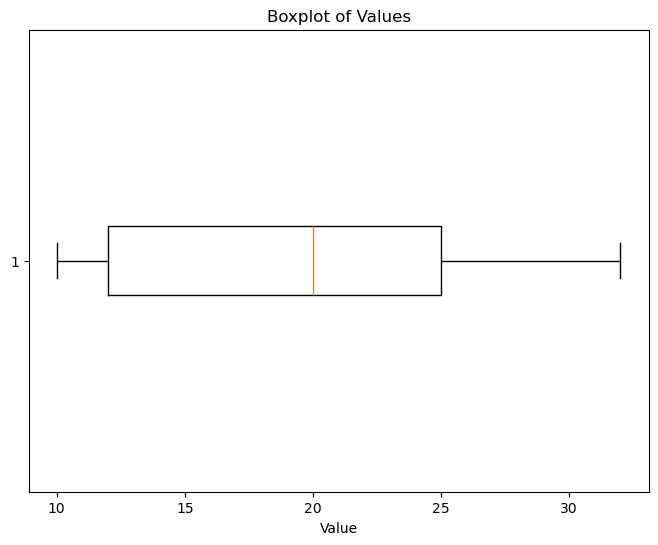

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Input data
data = {'value': [10, 12, 12, 15, 20, 22, 25, 28, 32]}
df = pd.DataFrame(data)

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['value'].quantile(0.25)
Q3 = df['value'].quantile(0.75)
IQR = Q3 - Q1

# Define the outlier thresholds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['value'] < lower_bound) | (df['value'] > upper_bound)]

# Remove outliers
df_no_outliers = df[(df['value'] >= lower_bound) & (df['value'] <= upper_bound)]

# Display the cleaned data without outliers
print("Cleaned data without outliers:")
print(df_no_outliers)

# Create a boxplot to visualize the data and outliers
plt.figure(figsize=(8, 6))
plt.boxplot(df['value'], vert=False)
plt.title("Boxplot of Values")
plt.xlabel("Value")
plt.show()


In [19]:
#Z-SQUARE

data = {'value': [10, 12, 12, 15, 20, 22, 25, 28, 32]}
df = pd.DataFrame(data)

# Calculate the Z-scores
mean = df['value'].mean()
std_dev = df['value'].std()
df['z_score'] = (df['value'] - mean) / std_dev

# Set a Z-score threshold for outliers (e.g., 3 or -3)
z_threshold = 3
outliers_z = df[df['z_score'].abs() > z_threshold]

# Output the outliers
print("Outliers based on Z-score method:")
print(outliers_z)

# Optionally, remove outliers (i.e., filter out the rows with high Z-scores)
df_no_outliers = df[df['z_score'].abs() <= z_threshold]
print("\nData after removing outliers:")
print(df_no_outliers)


Outliers based on Z-score method:
Empty DataFrame
Columns: [value, z_score]
Index: []

Data after removing outliers:
   value   z_score
0     10 -1.223185
1     12 -0.967170
2     12 -0.967170
3     15 -0.583146
4     20  0.056892
5     22  0.312908
6     25  0.696931
7     28  1.080954
8     32  1.592985


In [41]:


data = {'feature1': [0.0, 0.25, 0.5, 0.75, 1.0],
        'feature2': [0.0, 0.25, 0.5, 0.75, 1.0],
        'target': [0, 1, 0, 1, 0]}

df = pd.DataFrame(data)

# Define X (features) and y (target)
X = df.drop('target', axis=1)  # Features (independent variables)
y = df['target']  # Target (dependent variable)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Output the training and testing sets
print("Training features (X_train):")
print(X_train)
print("\nTesting features (X_test):")
print(X_test)
print("\nTraining target (y_train):")
print(y_train)
print("\nTesting target (y_test):")
print(y_test)


Training features (X_train):
   feature1  feature2
4      1.00      1.00
2      0.50      0.50
0      0.00      0.00
3      0.75      0.75

Testing features (X_test):
   feature1  feature2
1      0.25      0.25

Training target (y_train):
4    0
2    0
0    0
3    1
Name: target, dtype: int64

Testing target (y_test):
1    1
Name: target, dtype: int64


In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)


In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


In [29]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Load the Iris dataset
iris = load_iris()
X = iris.data  # Features
y = iris.target  # Target

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Training features (X_train):")
print(X_train[:5])  # Show the first 5 rows
print("\nTesting features (X_test):")
print(X_test[:5])  # Show the first 5 rows


Training features (X_train):
[[5.5 2.4 3.7 1. ]
 [6.3 2.8 5.1 1.5]
 [6.4 3.1 5.5 1.8]
 [6.6 3.  4.4 1.4]
 [7.2 3.6 6.1 2.5]]

Testing features (X_test):
[[6.1 2.8 4.7 1.2]
 [5.7 3.8 1.7 0.3]
 [7.7 2.6 6.9 2.3]
 [6.  2.9 4.5 1.5]
 [6.8 2.8 4.8 1.4]]


In [30]:
# First split: Training + temporary set (80% training, 20% temporary)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)

# Second split: Split the temporary set into validation and test sets (50% validation, 50% test)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Show the shapes of the splits
print(f"Training data: {X_train.shape}, {y_train.shape}")
print(f"Validation data: {X_val.shape}, {y_val.shape}")
print(f"Test data: {X_test.shape}, {y_test.shape}")


Training data: (120, 4), (120,)
Validation data: (15, 4), (15,)
Test data: (15, 4), (15,)
